In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,  BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

Загрузим датасет

In [3]:
diabetes_data = pd.read_csv("../data/diabetes/diabetes_preprocessed.csv", index_col = 0)
diabetes_data.head()

,Age,Polyuria,Polydipsia,Sudden_Weight_Loss,Weakness,Polyphagia,Genital_thrush,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,Class,Gender_Female,Gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1


Отделим признаки от классов

In [4]:
y = diabetes_data["Class"]
diabetes_data.drop('Class', axis =1, inplace = True)
X = diabetes_data
X

,Age,Polyuria,Polydipsia,Sudden_Weight_Loss,Weakness,Polyphagia,Genital_thrush,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,Gender_Female,Gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0


Разделим датасет на обучающую и тестовую выборки. Будем использовать стратификацию, чтобы отношение классов в разбиваемых блоках было одинаковое

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Отмасштабируем признаки

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train[['Age']])
scaler.fit(X_test[['Age']])
print(X_train[['Age']])
print(X_test[['Age']])

     Age
316   55
354   58
181   31
311   60
75    55
..   ...
219   27
429   58
308   34
300   35
283   57

[390 rows x 1 columns]
     Age
408   59
255   47
62    55
249   55
307   37
..   ...
398   53
121   35
428   48
326   53
426   54

[130 rows x 1 columns]


## K-means

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
all_predictions = kmeans.predict(X)
print(all_predictions)

[1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 0 

In [8]:
centers = np.array(kmeans.cluster_centers_)
centers

array([[59.48      ,  0.57777778,  0.50222222,  0.44      ,  0.69333333,
         0.61777778,  0.22666667,  0.67555556,  0.59555556,  0.31555556,
         0.61333333,  0.56444444,  0.53333333,  0.49777778,  0.21333333,
         0.35111111,  0.64888889],
       [39.29491525,  0.43389831,  0.40677966,  0.4       ,  0.50508475,
         0.33220339,  0.22033898,  0.27457627,  0.40338983,  0.18644068,
         0.34237288,  0.32881356,  0.25423729,  0.22711864,  0.13559322,
         0.38305085,  0.61694915]])

In [9]:
print(y.value_counts())

1    320
0    200
Name: Class, dtype: int64


In [10]:
print(pd.DataFrame(all_predictions).value_counts())

1    295
0    225
dtype: int64


## Иерархическая классификация

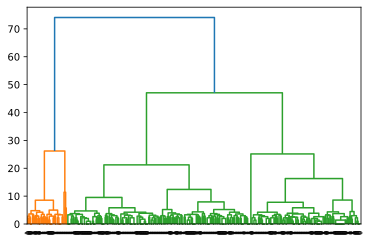

In [11]:
varieties = list(y)

# Извлекаем измерения как массив NumPy
samples = X.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

# KNN

Подберем оптимальное количество соседей

In [7]:
params = {'n_neighbors': np.arange(1,20,1)}
knn = KNeighborsClassifier()
classifier = GridSearchCV(knn, params)
classifier.fit(X_train, y_train)
classifier.best_params_

{'n_neighbors': 1}

Обучим модель и посмотрим на ее качество

In [8]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classifier.score(X_test, y_test))

[[46  4]
 [ 9 71]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        50
           1       0.95      0.89      0.92        80

    accuracy                           0.90       130
   macro avg       0.89      0.90      0.90       130
weighted avg       0.90      0.90      0.90       130

0.9


Knn показывает довольно неплохие результаты. Посмотрим, как будут вести себя другие способы классификации

# DTC

Найдем оптимальные параметры для деревьев

In [9]:
params = {'max_depth' : np.arange(1, 20, 1), 
         'max_features' : np.arange(1, 16, 1)}
dtc = DecisionTreeClassifier()
classifier = GridSearchCV(dtc, params)
classifier.fit(X_train, y_train)
classifier.best_params_

{'max_depth': 17, 'max_features': 10}

Обучим модель и посмотрим на ее качество

In [10]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classifier.score(X_test, y_test))

[[47  3]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.96      0.97      0.97        80

    accuracy                           0.96       130
   macro avg       0.96      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130

0.9615384615384616


DTC показывает более хороший результат, чем Knn

# NB

## Нормальное распределение

In [11]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print(classification_report(y_test, y_pred))
print(gaussian.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85        50
           1       0.87      0.99      0.92        80

    accuracy                           0.90       130
   macro avg       0.92      0.87      0.89       130
weighted avg       0.91      0.90      0.90       130

0.9


## Распределение Бернулли

In [12]:
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
y_pred = bernoulli.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(bernoulli.score(X_test, y_test))

[[42  8]
 [ 7 73]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        50
           1       0.90      0.91      0.91        80

    accuracy                           0.88       130
   macro avg       0.88      0.88      0.88       130
weighted avg       0.88      0.88      0.88       130

0.8846153846153846


Нормальное распределение показывает более хороший результат чем распределение Бернулли. Однако оба классификатора хуже чем Knn и DTC

# SVM

Найдем оптимальную степень полинома и параметр регуляризации

In [13]:
params = {'C': np.arange(0.1,1.1,0.1),
              'degree': np.arange(2,10,1)}
svc = SVC()
classifier = GridSearchCV(svc, params)
classifier.fit(X_train, y_train)
classifier.best_params_

{'C': 0.1, 'degree': 2}

Обучим модель и посмотрим на ее качество

In [14]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classifier.score(X_test, y_test))

[[ 0 50]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      1.00      0.76        80

    accuracy                           0.62       130
   macro avg       0.31      0.50      0.38       130
weighted avg       0.38      0.62      0.47       130

0.6153846153846154


E:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Качество модели плохое. Она не угадала ни один класс "0". Пока что это самая худшая модель для данной задачи

# LR

Найдем параметр регуляризации

In [15]:
params = {'C': np.arange(0.1,1.1,0.1),
         'max_iter': np.arange(1000, 10000, 100)}
lr = LogisticRegression()
classifier = GridSearchCV(lr, params)
classifier.fit(X_train, y_train)
classifier.best_params_

{'C': 0.8, 'max_iter': 1000}

Обучим модель и посмотрим на ее качество

In [16]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classifier.score(X_test, y_test))

[[43  7]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.91        50
           1       0.92      0.99      0.95        80

    accuracy                           0.94       130
   macro avg       0.95      0.92      0.93       130
weighted avg       0.94      0.94      0.94       130

0.9384615384615385


Модель показывает хорошие результаты

# Итог

Самая лучшая модель - DTC. Самая худшая модель - SVM